<a href="https://colab.research.google.com/github/avadhutc/Session4/blob/master/code/EVA_Session_4_First_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Begin with Vanilla Network with 19.6 K parameters (< 20 K Params)
## Going to note performance of following network before reducing parameters < 15 K

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras # install keras package
import keras # import keras package for use

In [0]:
import numpy as np # import numpy package alias np

from keras.models import Sequential # import Sequential flow to build model
from keras.layers import Flatten # import flatten layer to convert any dimensional layer into one di
from keras.layers import Convolution2D, MaxPooling2D # for doing convolution and maxpooling on image 
from keras.utils import np_utils # utility functions

from keras.datasets import mnist# import mnist dataset
from matplotlib import pyplot as plt # import pyplot alias plt for plotting
#%matplotlib inline # print results in notebook cells

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()# download mnist dataset and load for training and testing sets

(60000, 28, 28)


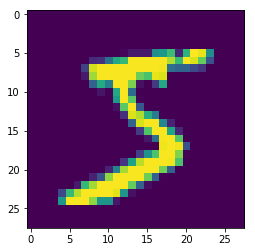

In [0]:
print (X_train.shape) # print shape of X_train dataset
 


plt.imshow(X_train[0]) # display image

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1) # reshape or arrange train dataset for all images with 1 channel 
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)# reshape or arrange test dataset for all images with 1 channel

In [0]:
X_train = X_train.astype('float32') # set datatype of training dataset as float32
X_test = X_test.astype('float32')# set datatype of test dataset as float32
X_train /= 255 # normalize training dataset between 0 and 1
X_test /= 255 # normalize tes dataset between 0 and 1

In [0]:
y_train[:10] # training set labels

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)# convert train labels into one-hot encodings
Y_test = np_utils.to_categorical(y_test, 10)# convert test labels into one-hot encodings

In [0]:
Y_train[:10]# print first 10 train labels


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation 

model = Sequential() # Sequential model
 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) # Input Channel dimension= 1, output channel dimension= 16, RF = 3, out_img_size = 26

model.add(Convolution2D(32, 3, 3, activation='relu')) # Input Channel dimension= 32, output channel dimension= 32, RF = 5, out_img_size = 24

model.add(MaxPooling2D(pool_size = (2, 2))) # Input Channel dimension= 32, output channel dimension= 32, RF = 6, out_img_size = 12
model.add(Convolution2D(10, 1, activation='relu')) # Input Channel dimension= 32, output channel dimension= 10, RF = 6, out_img_size = 12

model.add(Convolution2D(64, 3, 3, activation='relu'))# Input Channel dimension= 10, output channel dimension= 64, RF = 10, out_img_size = 10

model.add(Convolution2D(10, 1, activation='relu'))# Input Channel dimension= 64, output channel dimension= 10, RF = 10, out_img_size = 10

model.add(Convolution2D(64, 3, 3, activation='relu'))# Input Channel dimension= 10, output channel dimension= 64, RF = 14, out_img_size = 8

model.add(MaxPooling2D(pool_size = (2, 2)))# Input Channel dimension= 64, output channel dimension= 64, RF = 15, out_img_size = 4
model.add(Convolution2D(10, 1, activation='relu'))# Input Channel dimension= 64, output channel dimension= 10, RF = 15, out_img_size = 4
 
model.add(Convolution2D(10, 4)) # Input Channel dimension= 10, output channel dimension= 10, RF = 27, out_img_size = 1

model.add(Flatten()) #flatten image dimension into 1
model.add(Activation('softmax'))# softmax to assign confidence score of each class

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  if sys.path[0] == '':


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 12, 12, 10)        330       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 10, 10, 64)        5824      
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 10, 10, 10)        650       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 8, 8, 64)          5824      
__________

In [0]:
# import callbacks
from keras.callbacks import ModelCheckpoint

In [0]:
# save best weights 
final_weights_path = 'best_mnist_cnn_model.h5'

In [0]:
callbacks_list = [ModelCheckpoint(final_weights_path, monitor='val_acc', verbose = 1,save_best_only = True)]  


In [0]:
# model compilation
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
# model training
history = model.fit(X_train, Y_train, batch_size=32, nb_epoch=30, validation_data=(X_test,Y_test),callbacks = callbacks_list, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 14s 240us/step - loss: 0.2094 - acc: 0.9342 - val_loss: 0.0710 - val_acc: 0.9764

Epoch 00001: val_acc improved from -inf to 0.97640, saving model to best_mnist_cnn_model.h5
Epoch 2/30
60000/60000 [==============================] - 13s 210us/step - loss: 0.0682 - acc: 0.9789 - val_loss: 0.0492 - val_acc: 0.9843

Epoch 00002: val_acc improved from 0.97640 to 0.98430, saving model to best_mnist_cnn_model.h5
Epoch 3/30
60000/60000 [==============================] - 12s 208us/step - loss: 0.0518 - acc: 0.9841 - val_loss: 0.0463 - val_acc: 0.9859

Epoch 00003: val_acc improved from 0.98430 to 0.98590, saving model to best_mnist_cnn_model.h5
Epoch 4/30
60000/60000 [==============================] - 12s 208us/step - loss: 0.0428 - acc: 0.9865 - val_loss: 0.0496 - val_acc: 0.9843

Epoch 00004: val_acc did not improve from 0.98590
Epoch 5/30
60000/60000 [==============================] - 

# Visualization

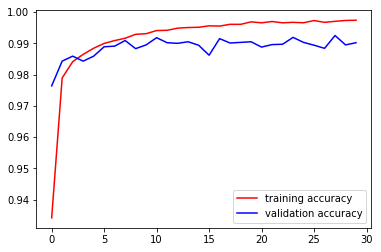

In [0]:
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

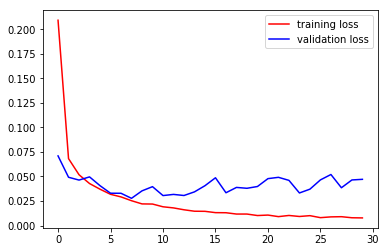

In [0]:
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [0]:
#model score accuarcy on test data
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.04711167192283101, 0.9902]


# Maximum Validation Accuracy achieved 99.25% @ 28th epoch with 19.6 K parameters
# Let's forward this network to 2nd notebook